In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
gas = pd.read_csv('gas_prices.csv')
gas.head(5)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


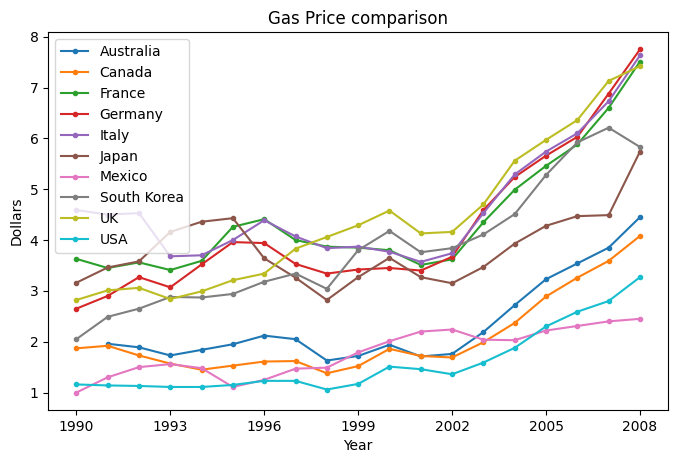

In [4]:
plt.figure(figsize=(8,5), dpi=100)
for country in gas:
    if country != 'Year':
        plt.plot(gas['Year'], gas[country], marker='.', label=country)
plt.title("Gas Price comparison")
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.xticks(gas['Year'][::3])
plt.legend()
plt.show()

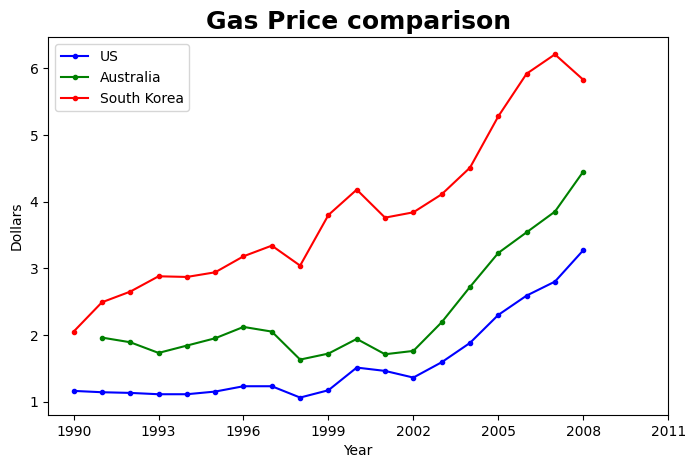

In [5]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Gas Price comparison", fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.plot(gas['Year'], gas['USA'], 'b.-', label='US')
plt.plot(gas['Year'], gas['Australia'], 'g.-', label='Australia')
plt.plot(gas['Year'], gas['South Korea'], 'r.-', label='South Korea')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.xticks(gas['Year'][::3].tolist() + [2011])
plt.legend()
plt.savefig('Gas_US_Aus_SK.png', dpi=300)
plt.show()

In [6]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
fifa.columns.sort_values()

Index(['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance',
       'BallControl', 'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Club',
       'Club Logo', 'Composure', 'Contract Valid Until', 'Crossing', 'Curve',
       'Dribbling', 'FKAccuracy', 'Finishing', 'Flag', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'HeadingAccuracy', 'Height', 'ID', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Name', 'Nationality', 'Overall',
       'Penalties', 'Photo', 'Position', 'Positioning', 'Potential',
       'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS',
       'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause', 'ST',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Str

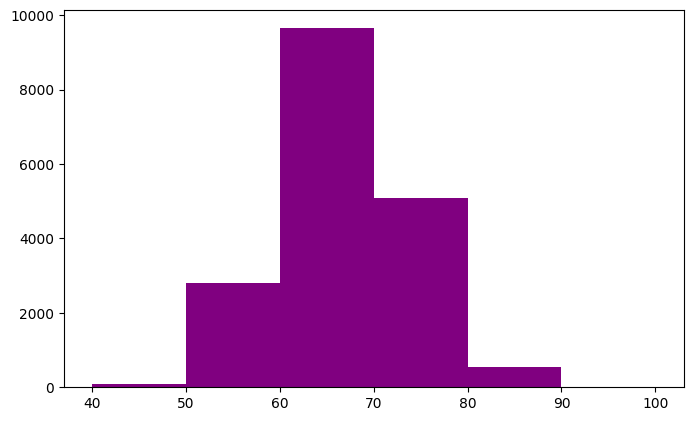

In [8]:
plt.figure(figsize=(8,5), dpi=100)
bins = np.arange(40, 110, 10)
plt.hist(fifa['Overall'], bins=bins, color="purple")
plt.show()

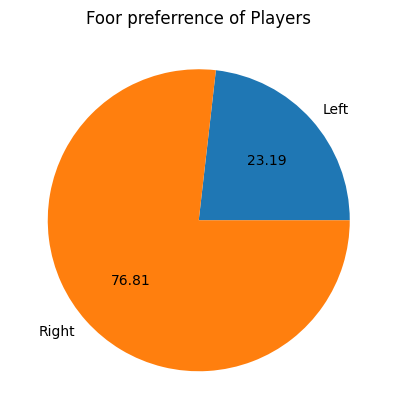

In [9]:
plt.figure(figsize=(5,5), dpi=100)
plt.title("Foor preferrence of Players")
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left', 'Right']
plt.pie([left, right], labels=labels, autopct='%.2f')
plt.show()

In [10]:
fifa['Weight'] = [float(x.strip('lbs')) if type(x) == str else x for x in fifa['Weight']]
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


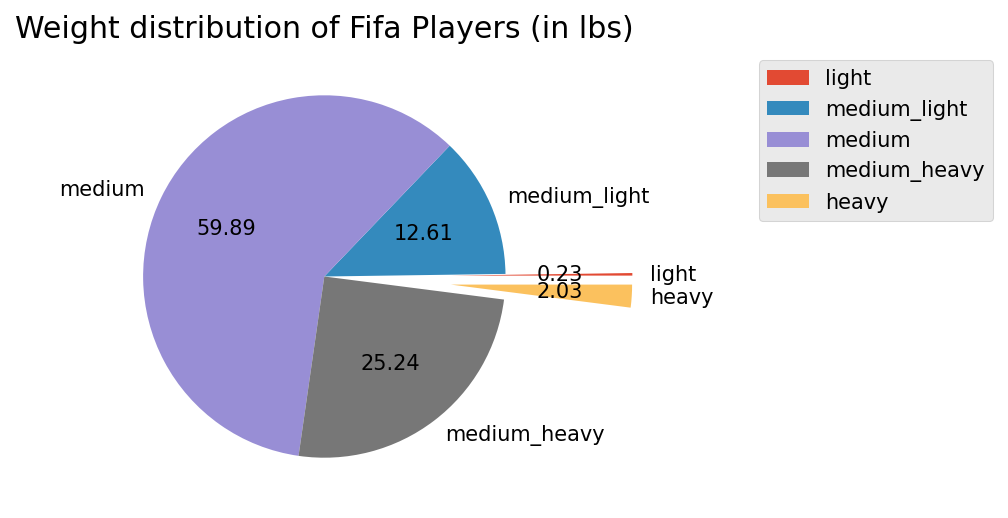

In [39]:
plt.figure(dpi=150)
plt.title('Weight distribution of Fifa Players (in lbs)')
plt.style.use('ggplot')
light = fifa.loc[fifa['Weight'] < 125].count()[0]
medium_light = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] <150)].count()[0]
medium = fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] <175)].count()[0]
medium_heavy = fifa.loc[(fifa['Weight'] >= 175) & (fifa['Weight'] <200)].count()[0]
heavy = fifa.loc[fifa['Weight'] >= 200].count()[0]
labels = ['light', 'medium_light', 'medium', 'medium_heavy', 'heavy']
explode = [.7, 0, 0, 0, .7]
plt.pie([light, medium_light, medium, medium_heavy, heavy], labels=labels, autopct='%.2f', explode=explode)
plt.legend(bbox_to_anchor=(2, 1))
plt.show()

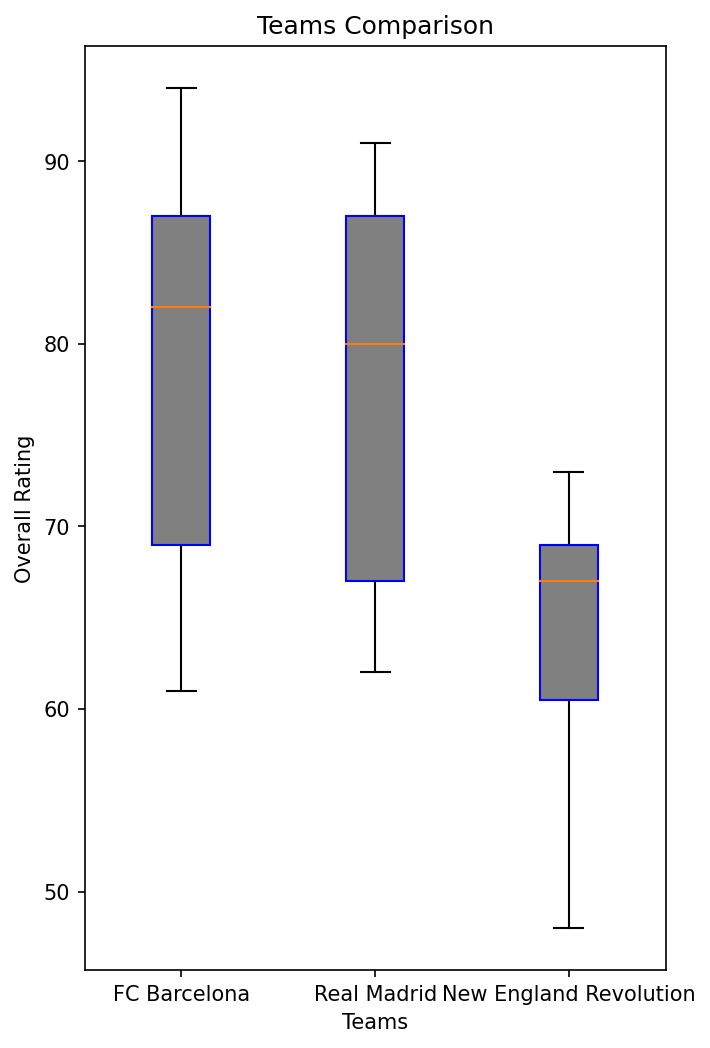

In [76]:
plt.figure(figsize=(5,8), dpi=150)
plt.title('Teams Comparison')
plt.style.use('default')
barcelona = fifa.loc[fifa['Club'] == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa['Club'] == 'Real Madrid']['Overall']
revolution = fifa.loc[fifa['Club'] == 'New England Revolution']['Overall']
labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']
boxes = plt.boxplot([barcelona, madrid, revolution], labels=labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(color='blue', facecolor='grey')

plt.xlabel('Teams')
plt.ylabel('Overall Rating')
plt.show()